In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 지니

In [ ]:
genie = pd.read_csv('지니(2080개).csv', header = None, encoding = 'cp949')
genie

,0,1,2,3
0,노래,1325,4.01308416876%,4.01308416876%
1,재생,730,2.21098222128%,6.22406639004%
2,멜론,705,2.13526365206%,8.3593300421%
3,사용,629,1.90507920162%,10.2644092437%
4,업데이트,519,1.57191749705%,11.8363267408%
...,...,...,...,...
10183,용도,1,0.00302874276888%,99.9878850289%
10184,구글들어가서,1,0.00302874276888%,99.9909137717%
10185,위함입니다,1,0.00302874276888%,99.9939425145%
10186,멜론앱만,1,0.00302874276888%,99.9969712572%


In [ ]:
genie.drop(labels = [2, 3], axis = 1, inplace = True)
genie

,0,1
0,노래,1325
1,재생,730
2,멜론,705
3,사용,629
4,업데이트,519
...,...,...
10183,용도,1
10184,구글들어가서,1
10185,위함입니다,1
10186,멜론앱만,1


In [ ]:
for i in range(10188):
  if genie.loc[i][1] < 100:
    genie.drop(labels = i, axis = 0, inplace = True)

genie

,0,1
0,노래,1325
1,재생,730
2,멜론,705
3,사용,629
4,업데이트,519
5,불편,423
6,음악,405
7,로그인,305
8,진짜,246
9,설정,233


In [ ]:
genie[1].sum()

8924

In [ ]:
genie_exchange = pd.DataFrame({'단어' : ['노래', '재생', '멜론', '사용', '업데이트', '플레이리스트', '그외'],
                               '단어 수' : [1325,730,705,629,519,154,(8924-730-705-629-519-154)]})

genie_exchange

,단어,단어 수
0,노래,1325
1,재생,730
2,멜론,705
3,사용,629
4,업데이트,519
5,플레이리스트,154
6,그외,6187


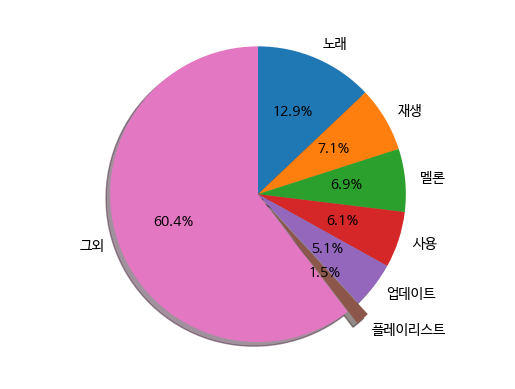

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
explode_value = (0,0,0,0,0,0.1,0)

plt.axis('equal')
plt.pie(genie_exchange['단어 수'], labels = genie_exchange['단어'], startangle = 90, explode = explode_value, shadow = True, autopct = '%1.1f%%', counterclock = False)
plt.show()

# 지니, 멜론, 유튜브 뮤직

# 설문조사

In [ ]:
survey = pd.DataFrame({'단어' : ['뮤직', '플레이리스트', '추천', '아티스트', '그외'],
                       '비율' : [17 / 78 * 100, 16 / 78 * 100, 12 / 78 * 100, 6 / 78 * 100, 100 - (17+16+12+6)/78*100]})
survey

,단어,비율
0,뮤직,21.794872
1,플레이리스트,20.512821
2,추천,15.384615
3,아티스트,7.692308
4,그외,34.615385


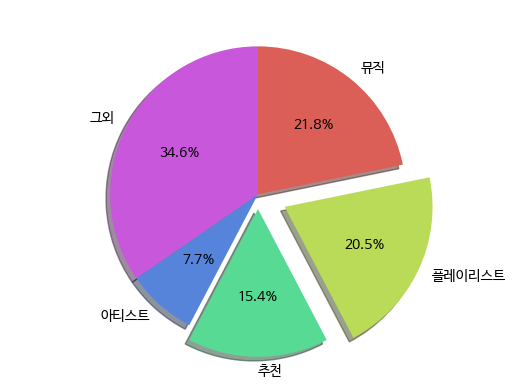

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
explode_value = (0,0.2,0.1,0,0)
colors = sns.color_palette('hls', 5)

plt.axis('equal')
plt.pie(survey['비율'], labels = survey['단어'], startangle = 90, explode = explode_value, shadow = True, autopct = '%1.1f%%', counterclock = False, colors = colors)
plt.show()

# 오디오북 긍정 부정

In [ ]:
audio = pd.DataFrame({'긍정' : [88.12],
                      '부정' : [11.88]})
audio

,긍정,부정
0,88.12,11.88


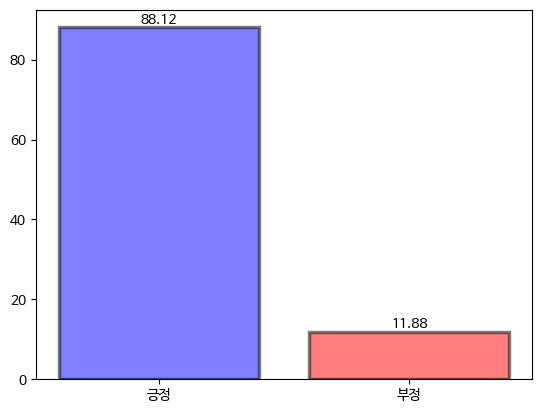

In [ ]:
bar = plt.bar(audio.columns, audio.loc[0], color = ['b', 'r'], alpha = 0.5, edgecolor = 'black', linewidth = 2.5)
plt.rcParams['font.family'] = 'NanumBarunGothic'

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 10)

plt.show()

# 추가 시각화

In [ ]:
youtube = pd.DataFrame({'제목' : ['콩순이-손가락(Eng)', '콩순이-손가락(Kor)', '바다 타험대 옥토넛 - 할로윈', '미니특공대 애니멀트론', '바다 타험대 옥토넛 - ㄱㄴㄷ', '콩순이 - 머핀맨', '미니특공대 -아야야야'],
                        '조회수' : [29247498, 15851897, 5561701, 3306471, 3306445, 3174213, 3106306]})
youtube

,제목,조회수
0,콩순이-손가락(Eng),29247498
1,콩순이-손가락(Kor),15851897
2,바다 타험대 옥토넛 - 할로윈,5561701
3,미니특공대 애니멀트론,3306471
4,바다 타험대 옥토넛 - ㄱㄴㄷ,3306445
5,콩순이 - 머핀맨,3174213
6,미니특공대 -아야야야,3106306


<Axes: xlabel='노래 제목', ylabel='조회수(천만:단위)'>

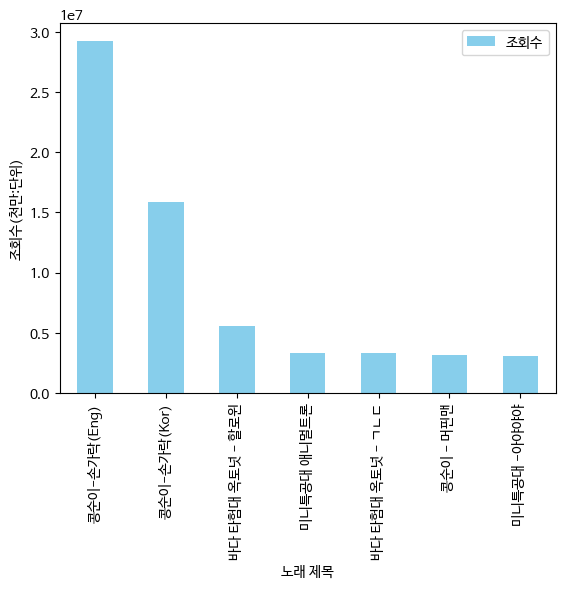

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
youtube.plot.bar(x='제목', y='조회수', rot=90, color = 'skyblue', xlabel = '노래 제목', ylabel = '조회수(천만:단위)')

# 설문조사 9번

In [ ]:
survey = pd.read_csv('설문조사 9번.csv')
survey_change = survey[['9. 플레이리스트를 추천해준다면 어떤 플레이리스트를 추천해주고 싶나요?']]
survey_change

,9. 플레이리스트를 추천해준다면 어떤 플레이리스트를 추천해주고 싶나요?
0,"발라드, pop,재즈 등 한 장르로만 구성된 플레이리스트"
1,"발라드, pop,재즈 등 한 장르로만 구성된 플레이리스트"
2,날씨와 어울리는 플레이리스트
3,노래의 분위기에 따라 그 날 기분에 맞춰 들을 수 있는 플레이리스트
4,노래의 분위기에 따라 그 날 기분에 맞춰 들을 수 있는 플레이리스트
...,...
95,노래의 분위기에 따라 그 날 기분에 맞춰 들을 수 있는 플레이리스트
96,"발라드, pop,재즈 등 한 장르로만 구성된 플레이리스트"
97,노래의 분위기에 따라 그 날 기분에 맞춰 들을 수 있는 플레이리스트
98,여러 장르가 섞인 플레이리스트


In [ ]:
survey_count = survey_change['9. 플레이리스트를 추천해준다면 어떤 플레이리스트를 추천해주고 싶나요?'].value_counts()
survey_data = pd.DataFrame(survey_count)
survey_data = survey_data.rename(columns = {'9. 플레이리스트를 추천해준다면 어떤 플레이리스트를 추천해주고 싶나요?':'조사수'})
survey_data

,조사수
노래의 분위기에 따라 그 날 기분에 맞춰 들을 수 있는 플레이리스트,56
"발라드, pop,재즈 등 한 장르로만 구성된 플레이리스트",20
날씨와 어울리는 플레이리스트,12
여러 장르가 섞인 플레이리스트,11


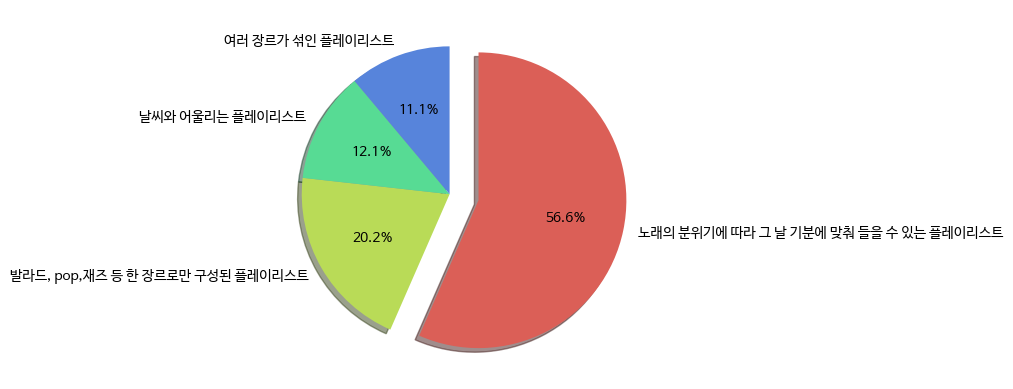

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
explode_value = (0.2,0,0,0)
colors = sns.color_palette('hls', 5)

plt.axis('equal')
plt.pie(survey_data['조사수'], labels = survey_data.index, startangle = 90, explode = explode_value, shadow = True, autopct = '%1.1f%%', counterclock = False, colors = colors)
plt.show()

# 육아

In [ ]:
baby = pd.DataFrame({'주제' : ['육아휴직', '중앙육아종합지원센터', '물', '급여', '전자학습', '가족', '분만', '정책'],
                     '양' : [24, 11, 8, 7, 6, 5, 3, 2]})
baby

,주제,양
0,육아휴직,24
1,중앙육아종합지원센터,11
2,물,8
3,급여,7
4,전자학습,6
5,가족,5
6,분만,3
7,정책,2


<Axes: xlabel='육아 키워드', ylabel='조회 수'>

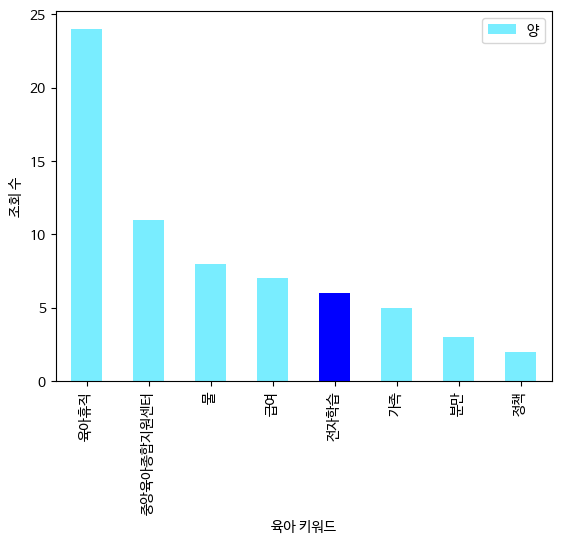

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
colors = ['#79EDFF', '#79EDFF', '#79EDFF', '#79EDFF', 'blue', '#79EDFF', '#79EDFF', '#79EDFF']
baby.plot.bar(x='주제', y='양', rot=90, color = colors, xlabel = '육아 키워드', ylabel = '조회 수')

# 뮤직컬러, 뮤직허그 - 네이버 트랜드

In [ ]:
date = ['2020.05.01', '2020.08.01', '2020.12.01', '2021.04.01', '2021.07.01', '2021.11.01', '2022.03.01', '2022.06.01', '2022.10.01', '2023.03.01']
music_color = [0,0,30,10,50,85,0,15,0,0]
music_hug = [10,20,10,30,15,8,10,0,5,0]

music_data = pd.DataFrame({'뮤직컬러' : [0,0,30,10,50,85,0,15,0,0],
                          '뮤직허그' : [10,20,10,30,15,8,10,0,5,0]})
music_data

,뮤직컬러,뮤직허그
0,0,10
1,0,20
2,30,10
3,10,30
4,50,15
5,85,8
6,0,10
7,15,0
8,0,5
9,0,0


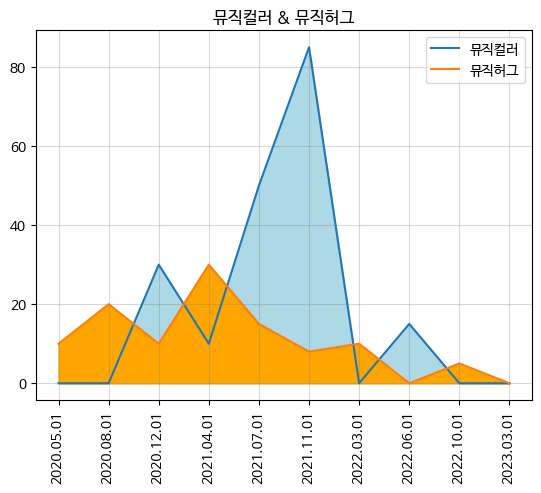

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.xticks(rotation=90)
plt.title('뮤직컬러 & 뮤직허그')
plt.plot(date, music_color, label = '뮤직컬러')
plt.fill_between(date, music_color, color='lightblue')
plt.plot(date, music_hug, label = '뮤직허그')
plt.fill_between(date, music_hug, color='orange')

plt.grid(color = 'gray', alpha = 0.3)

plt.legend()

plt.show()

# 밀리의 서재

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [ ]:
# 밀리

book = pd.read_csv('밀리의 서재(오디오북, 오디오만 포함된 리뷰 자연어처리).csv', encoding = 'cp949', header = None)
book.rename(columns = {0:'크롤링', 1:'횟수'}, inplace = True)
book.drop([2, 3], axis = 1, inplace = True)
book[:10]

,크롤링,횟수
0,오디오북,93.0
1,밀리,65.0
2,사용,60.0
3,오디오,58.0
4,불편,58.0
5,재생,55.0
6,서재,52.0
7,이용,34.0
8,독서,33.0
9,페이지,32.0


In [ ]:
book = book.dropna()

In [ ]:
# 딕셔너리로 변환
wc = book.set_index('크롤링').to_dict()['횟수']

In [ ]:
# 워드 클라우드 생성
wordCloud = WordCloud(
    font_path = "NanumGothic.ttf",
    width = 400,
    height = 400,
    max_font_size = 100,
    background_color = 'white'
).generate_from_frequencies(wc)

(-0.5, 399.5, 399.5, -0.5)

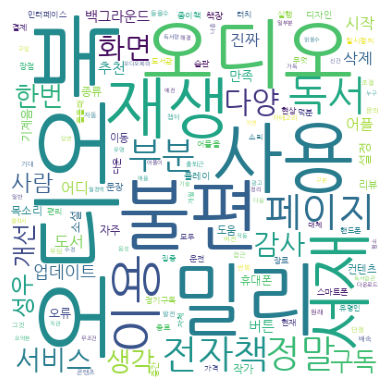

In [ ]:
# 그래프 출력
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')

# 밀리의서재에 오디오북이 있는지 없는지 안다 / 모른다

In [ ]:
audio = pd.read_csv('밀리의서재(오디오북 안다_모른다).csv')
audio = audio.iloc[:, 0].to_frame()
audio = audio.dropna()
audio.head()

,오디오북 인지
0,아니오
1,아니오
2,네
3,아니오
4,아니오


In [ ]:
# 예와 아니오를 카운트하여 데이터프레임으로 만들기
count_df = audio['오디오북 인지'].value_counts().reset_index()
count_df.columns = ['Response', 'Count']
count_df.head()

,Response,Count
0,아니오,80
1,네,20


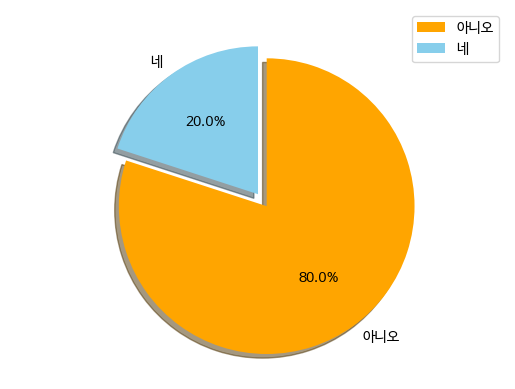

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False
explode_value = (0.1,0)
colors = ('orange', 'skyblue')

plt.axis('equal')
plt.pie(count_df['Count'], labels = count_df['Response'], startangle = 90, explode = explode_value, shadow = True, autopct = '%1.1f%%', counterclock = False, colors = colors)
plt.legend(response)
plt.show()